In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

This model uses a neural network and GridSearchCV to predict share price impacts of Interest changes

# Read the CSV and Perform Basic Data Cleaning

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df_stock1 = pd.read_csv("../../static/data/min.csv")
# Drop the null columns where all values are null
df_stock2 = df_stock1.dropna(axis='columns', how='all')
# Drop the null rows
df = df_stock2.dropna()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,RBA,FED,CPI
4046,27/07/2022,49.180000,49.669998,48.380001,48.799999,48.799999,1093958,1.35,2.5,125.0
4047,28/07/2022,50.990002,53.650002,49.520000,53.209999,53.209999,2970775,1.35,2.5,125.0
4048,29/07/2022,54.610001,56.049999,53.520000,53.740002,53.740002,1829089,1.35,2.5,125.0
4049,1/08/2022,54.509998,55.099998,53.820000,53.959999,53.959999,918089,1.35,2.5,125.0
4050,2/08/2022,53.509998,54.180000,52.380001,53.080002,53.080002,1109965,1.35,2.5,125.0


In [4]:
# Connect to MongoDb
from pymongo import MongoClient
mongoClient = MongoClient()
db = mongoClient.sharesDB

df_mongo = pd.DataFrame(list(db.min.find()))
last_val = df_mongo.iloc[-1:].values
last_date = last_val[0][1]
last_close = last_val[0][5]
# print(last_val)
print(last_date,last_close)
df_mongo.tail

12/08/2022 59.349998474121094


<bound method NDFrame.tail of                            _id        Date       Open       High        Low  \
0     62ec7f606f3835e21d297578  28/07/2006   1.200000   1.200000   1.120000   
1     62ec7f606f3835e21d297579  31/07/2006   1.150000   1.150000   1.120000   
2     62ec7f606f3835e21d29757a   1/08/2006   1.150000   1.150000   1.130000   
3     62ec7f606f3835e21d29757b   2/08/2006   1.150000   1.150000   1.140000   
4     62ec7f606f3835e21d29757c   3/08/2006   1.190000   1.195000   1.175000   
...                        ...         ...        ...        ...        ...   
4054  62f223db712569e24019e187  08/08/2022  57.599998  59.480000  56.849998   
4055  62f36d2eefedc504862b3b78  09/08/2022  58.000000  59.939999  57.720001   
4056  62f6fb8b102c368b7e26b585  10/08/2022  59.000000  59.720001  58.259998   
4057  62f6fb8b102c368b7e26b586  11/08/2022  60.000000  60.240002  58.509998   
4058  62f6fb8b102c368b7e26b587  12/08/2022  59.200001  60.080002  58.669998   

          Close  Adj 

# Use `RBA`,`FED` and `CPI` for the X values

In [5]:
X = df_mongo[["RBA","FED","CPI"]]
y = df_mongo["Close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4059, 3) (4059, 1)


In [6]:
X

,RBA,FED,CPI
0,5.75,5.25,86.7
1,5.75,5.25,86.7
2,5.75,5.25,86.7
3,6.00,5.25,86.7
4,6.00,5.25,86.7
...,...,...,...
4054,1.85,2.50,125.0
4055,1.85,2.50,125.0
4056,1.85,2.50,125.0
4057,1.85,2.50,125.0


# Create a Train Test Split

In [7]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train.info)

(3044, 3) (3044, 1)
(1015, 3) (1015, 1)
<bound method DataFrame.info of        RBA   FED    CPI
1559  3.50  0.25  101.8
1225  4.75  0.25   99.2
1213  4.75  0.25   99.2
11    6.00  5.25   86.7
3966  0.10  0.50  123.4
...    ...   ...    ...
3839  0.10  1.25  119.7
1096  4.75  0.25   96.9
3980  0.10  0.50  125.0
235   6.25  5.25   88.3
1061  4.50  0.25   96.9

[3044 rows x 3 columns]>


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model

In [9]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6028422855637317
Testing Score: 0.6017394932616077


In [10]:
# X_train = X_train.reshape((X_train.shape[0], 1))

In [11]:
#Linear Regression Residual showing difference actual vs predicted
# residual = pd.DataFrame([model.predict(X_train),y_train,(model.predict(X_train)-y_train)])
# residual.tail

Text(0.5, 1.0, 'Residual Plot')

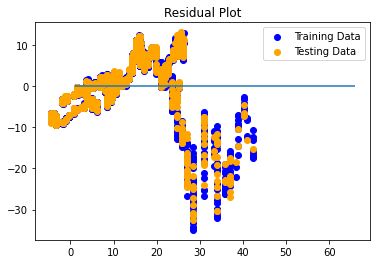

In [12]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [13]:
# Linear Regression: X_test predictions to variable
predictions = model.predict(X_test)

#### R2 Score is a very popular metric used for evaluating the performance of linear regression models. Where R2 Score is between 0 and 1, the closer to 1, the better the regression fit.
#### Use MSE or MAE when comparing two or more models, the lower the value of MSE or MAE, the better. MSE (Mean Square Error): Uses Euclidean distance to calculate the error. MSE gives the magnitude of the error only.

In [14]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 67.47136928813966, R2: 0.6017394932616077


#### Lasso regression imposes a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. It comes with a parameter, alpha , and the higher the alpha , the more feature coefficients are zero. When alpha is 0 , Lasso regression produces the same coefficients as a linear regression.

In [15]:
# LASSO model
# Note: Used an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 67.46508435230768, R2: 0.6017765910966697


In [16]:
# Ridge model
# Note: Used an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 67.47136351425739, R2: 0.6017395273428676


In [17]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 67.46022878186714, R2: 0.6018052518747828


# Hyperparameter Tuning

In [18]:
y_target = df_mongo["Close"]
y_target.shape

(4059,)

In [19]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_target, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3044, 3) (3044,)
(1015, 3) (1015,)


In [20]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3044, 3) (3044,)
(1015, 3) (1015,)


#### GridSearchCV and RandomizedSearchCV are techniques to evaluate models for a given hyperparameter vector using cross-validation, hence the “CV” suffix of the class name.
#### We are executing many models together is to find which machine learning model works best for this particular dataset.

In [21]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [22]:
regressors = [
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [23]:
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

RandomForestRegressor()
	Training time: 0.584s
	Prediction time: 0.048s
	Explained variance: 0.9871431405987181
	Mean absolute error: 0.8056425933944171
	R2 score: 0.9871431113733989

DecisionTreeRegressor()
	Training time: 0.008s
	Prediction time: 0.002s
	Explained variance: 0.9871144624167963
	Mean absolute error: 0.8060260126146218
	R2 score: 0.9871144615069676

KNeighborsRegressor()
	Training time: 0.010s
	Prediction time: 0.014s
	Explained variance: 0.9822310510277706
	Mean absolute error: 0.904611821334475
	R2 score: 0.9822270913085114

GradientBoostingRegressor()
	Training time: 0.277s
	Prediction time: 0.009s
	Explained variance: 0.9856142563634553
	Mean absolute error: 0.9483652501742809
	R2 score: 0.9856134549059375

KNeighborsRegressor()
	Training time: 0.009s
	Prediction time: 0.014s
	Explained variance: 0.9822310510277706
	Mean absolute error: 0.904611821334475
	R2 score: 0.9822270913085114

ExtraTreesRegressor()
	Training time: 0.447s
	Prediction time: 0.049s
	Explained v

#### By comparing these results, we can quickly see that RandomForestRegressor and DecisionTreeRegressor are the best models for our data
#### Machine learning models have parameters, which are the internal coefficients set by training or optimizing the model on a training dataset.
#### Parameters are different from hyperparameters. Parameters are learned automatically; hyperparameters are set manually to help guide the learning process.

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [25]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [26]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [27]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [28]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.8107 degrees.
Accuracy = 93.74%.
Model Performance
Average Error: 0.8064 degrees.
Accuracy = 93.75%.
Improvement of 0.02%.


In [29]:
# Hyperparameter tuning has not improved accuracy significantly

In [30]:
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)
y_test_pred = model_rfr.predict(X_test)
y_test_pred

array([ 4.80831925,  3.54130672,  2.93164514, ...,  7.84676059,
        6.21817982, 10.5797443 ])

In [31]:
#RandomForestRegressor Residual showing difference actual vs predicted
residual_dtr = pd.DataFrame([model_rfr.predict(X_train),y_train,(model_rfr.predict(X_train)-y_train)])
residual_dtr.tail

<bound method NDFrame.tail of        0          1          2         3          4         5          6     \
0  8.080526  12.020783  12.020783  1.355764  47.940528  4.719759  17.498458   
1  7.670000  12.180000  12.300000  1.360000  52.709999  4.700000  16.990000   
2  0.410526  -0.159217  -0.279217 -0.004236  -4.769471  0.019759   0.508458   

        7          8         9     ...      3034       3035       3036  \
0  10.887431  44.090266  9.197925  ...  7.357056  19.547748  46.244525   
1   9.700000  42.029999  9.200000  ...  7.450000  21.530001  41.200001   
2   1.187431   2.060267 -0.002075  ... -0.092944  -1.982253   5.044524   

        3037     3038       3039       3040       3041    3042       3043  
0  14.053129  6.90816  55.231670  10.921927  59.538209  3.6095  10.270854  
1  10.920000  6.70000  43.330002  10.230000  60.700001  3.5900  10.410000  
2   3.133129  0.20816  11.901668   0.691927  -1.161792  0.0195  -0.139146  

[3 rows x 3044 columns]>

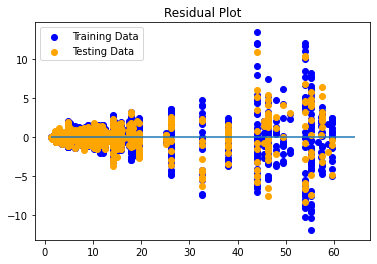

In [32]:
# Make predictions using fitted model
predictions1 = model_rfr.predict(X_test)

# Plotted the difference between the model predicted values and actual y values, versus the model predicted values
plt.scatter(model_rfr.predict(X_train), y_train - model_rfr.predict(X_train), c="blue", label="Training Data")
plt.scatter(model_rfr.predict(X_test), y_test - model_rfr.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

# Save the Model

In [33]:
import pickle
filename = '../../static/min_model_rfr.sav'
pickle.dump(model, open(filename, 'wb'))
model_in_rfr = pickle.load(open(filename, 'rb'))

In [34]:
# from joblib import dump,load
# model_in_rfr = load('min_model_rfr.sav')

In [35]:
rba = float(1.35)
fed = float(1.75)
cpi = float(123.90)
input =40
rfr=[]

def randomforest(rba,fed,cpi):
    for i in range(0,input):
      rfr.append([rba,fed,cpi])
      np.round_(rfr,2,out = None) 
      df = pd.DataFrame(rfr, columns = ['RBA','FED',"CPI"])
      df.round(2)
      pred_rf=model_in_rfr.predict(df)
      df['Prediction'] = pred_rf
      df['Prediction'] = df['Prediction'].astype(float).round(2)
      rba+=0.25
      fed+=0.25
      cpi+=0.25
      # print(df)
    my_rforest = df.to_dict(orient='records')
    for dict_value in my_rforest:
      for k, v in dict_value.items():
        dict_value[k] = round(v, 2)
    return my_rforest,df
# print(my_rforest)
my_rf,df = randomforest(rba,fed,cpi)
print(df,my_rf)


      RBA    FED     CPI  Prediction
0    1.35   1.75  123.90       38.68
1    1.60   2.00  124.15       39.96
2    1.85   2.25  124.40       41.25
3    2.10   2.50  124.65       42.53
4    2.35   2.75  124.90       43.81
5    2.60   3.00  125.15       45.10
6    2.85   3.25  125.40       46.38
7    3.10   3.50  125.65       47.67
8    3.35   3.75  125.90       48.95
9    3.60   4.00  126.15       50.24
10   3.85   4.25  126.40       51.52
11   4.10   4.50  126.65       52.81
12   4.35   4.75  126.90       54.09
13   4.60   5.00  127.15       55.37
14   4.85   5.25  127.40       56.66
15   5.10   5.50  127.65       57.94
16   5.35   5.75  127.90       59.23
17   5.60   6.00  128.15       60.51
18   5.85   6.25  128.40       61.80
19   6.10   6.50  128.65       63.08
20   6.35   6.75  128.90       64.37
21   6.60   7.00  129.15       65.65
22   6.85   7.25  129.40       66.94
23   7.10   7.50  129.65       68.22
24   7.35   7.75  129.90       69.50
25   7.60   8.00  130.15       70.79
2

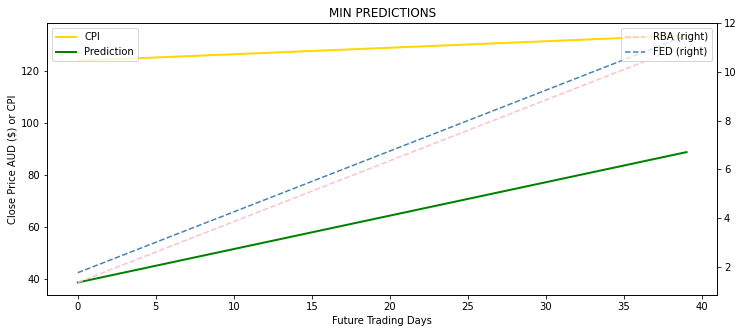

In [36]:
# DRAW THE PREDICTION
#Append the input amount of trading days to dates dictionary
input=40
# df_pred = df.iloc[0:(input-1)]
plot1 = df.plot(y=["CPI","Prediction"], figsize=(12, 5),color=['gold','green'],linewidth=2)
plot2 = df.plot(y=["RBA","FED"],secondary_y=True, ax=plot1,color=['pink','steelblue'],linestyle='dashed')
plt.title('MIN PREDICTIONS')
plot1.set_xlabel('Future Trading Days', fontsize=10)
plot1.set_ylabel('Close Price AUD ($) or CPI', fontsize=10)
plot1.legend(loc='upper left')
plot2.legend(loc='upper right')
plt.savefig('../../static/data/images/min_rfr_pred.png', bbox_inches="tight")
plt.show()

In [37]:
rba = float(1.35)
fed = float(1.75)
cpi = float(123.90)
def rforest(rba,fed,cpi):
    dtr =[[rba,fed,cpi]]
    df = pd.DataFrame (dtr, columns = ['RBA','FED',"CPI"])
    pred_dtr=model_in_rfr.predict(df)
    df['Prediction'] = pred_dtr
    print(df)
    df_dict = df.to_dict(orient='records')
    return pred_dtr
Pred_rf = rforest(rba,fed,cpi)
print(Pred_rf)

    RBA   FED    CPI  Prediction
0  1.35  1.75  123.9   38.676377
[38.67637738]


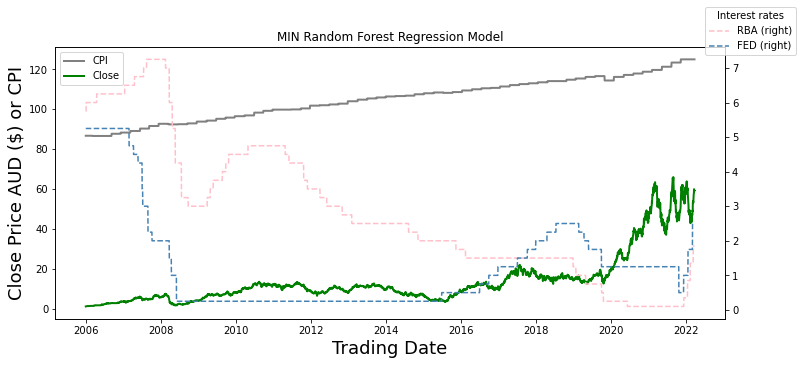

In [38]:
# x = np.arange(2006,2024,9)
ax = df_mongo.plot(y=["CPI","Close"], figsize=(12, 5),color=['grey','green'],linewidth=2)
df_mongo.plot(y=["RBA","FED"],secondary_y=True, ax=ax,color=['pink','steelblue'],linestyle='dashed')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=-4, title="Interest rates")
ax.legend(loc='upper left')
ax.set_xticks([0,500,1000,1500,2000,2500,3000,3500,4000])
ax.set_xticklabels([2006,2008,2010,2012,2014,2016,2018,2020,2022], rotation=0)
ax.set_title('MIN Random Forest Regression Model')
ax.set_xlabel('Trading Date', fontsize=18)
ax.set_ylabel('Close Price AUD ($) or CPI', fontsize=18)
plt.savefig('../../static/data/images/min_tree.png')

#Save predicted error to MongoDB

In [39]:
# Module used to connect Python with MongoDb
import pymongo

In [40]:
# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Define the 'sharesDB' database in Mongo
db = client.sharesDB.companys

name = 'MIN'

In [41]:
# query the companys collection
companys = db.find({'model': 'RFR',
      'name': name})
# see change in the collection
for company in companys:
    print(company)

{'_id': ObjectId('62ee2b0a98227c0130f4d21f'), 'model': 'RFR', 'name': 'MIN', 'date': '05/08/2022', 'predicted': 38, 'actual': 57, 'difference': -18.8506, 'accuracy': 93.56}


In [42]:
#save last price actual to variable
actual_price = df_mongo.iloc[-1,5]
actual_date = df_mongo.iloc[-1,1] 
actual_price = int(actual_price)
base_accuracy=round(base_accuracy,2)
print(base_accuracy,actual_price,actual_date)

93.74 59 12/08/2022


In [43]:
# Set keys and values of company
predicted = int(Pred_rf)
difference = Pred_rf-actual_price
difference=difference[0]
print(f'date {actual_date},predicted {predicted},actual {actual_price}, difference {difference},accuracy {base_accuracy}')

date 12/08/2022,predicted 38,actual 59, difference -20.323622622926365,accuracy 93.74


In [44]:
# Delete a document from a collection
db.delete_one(
    {'model': 'RFR','name': name}
)


In [45]:
# Insert a document into the 'companys' collection
db.insert_one(
    {
      'model': 'RFR',
      'name': name,
      'date': actual_date,
      'predicted': predicted,
      'actual': actual_price,
      'difference': round(difference,4),
      'accuracy': base_accuracy        
    }
)

# query the classroom collection
companys = db.find({'model': 'RFR','name': name})

# see change in collection
for company in companys:
    print(company)

{'_id': ObjectId('62f83473d6fc67e45e0eff78'), 'model': 'RFR', 'name': 'MIN', 'date': '12/08/2022', 'predicted': 38, 'actual': 59, 'difference': -20.3236, 'accuracy': 93.74}
